In [1]:
#Installing a library
!pip install ppscore

In [2]:
#Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
import ppscore as pps # for pps score calculation
import scipy
import warnings

In [3]:
#Importing functions from the above library
from scipy import stats
from numpy import set_printoptions
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler # for normalization
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

# **1. Data Exploration and Preprocessing**

In [4]:
# Upload dataset - adult_with_headers.csv
#Reading our dataset
df = pd.read_csv('adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
df.duplicated().sum()

24

In [9]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [10]:
data = df.drop_duplicates()
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
# Scaling the data using standard scalar and minmax scalar
ss = StandardScaler()
mms = MinMaxScaler()

num_col = df.select_dtypes(include = ('float64', 'int64')).columns # Selecting only the numeric columns
df_ss = ss.fit_transform(df[num_col])
df_mms = mms.fit_transform(df[num_col])

In [12]:
df_ss = pd.DataFrame(df_ss, columns = num_col)
df_mms = pd.DataFrame(df_mms, columns = num_col)

In [13]:
df_ss

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [14]:
df_mms

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


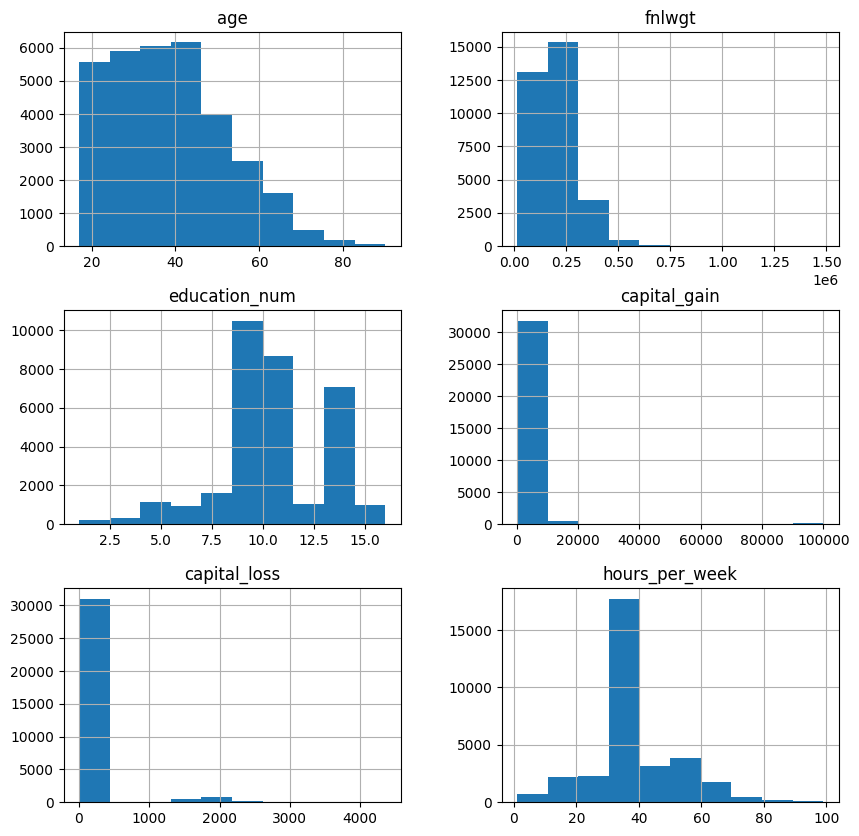

In [15]:
df.hist(figsize = (10,10))
plt.show()

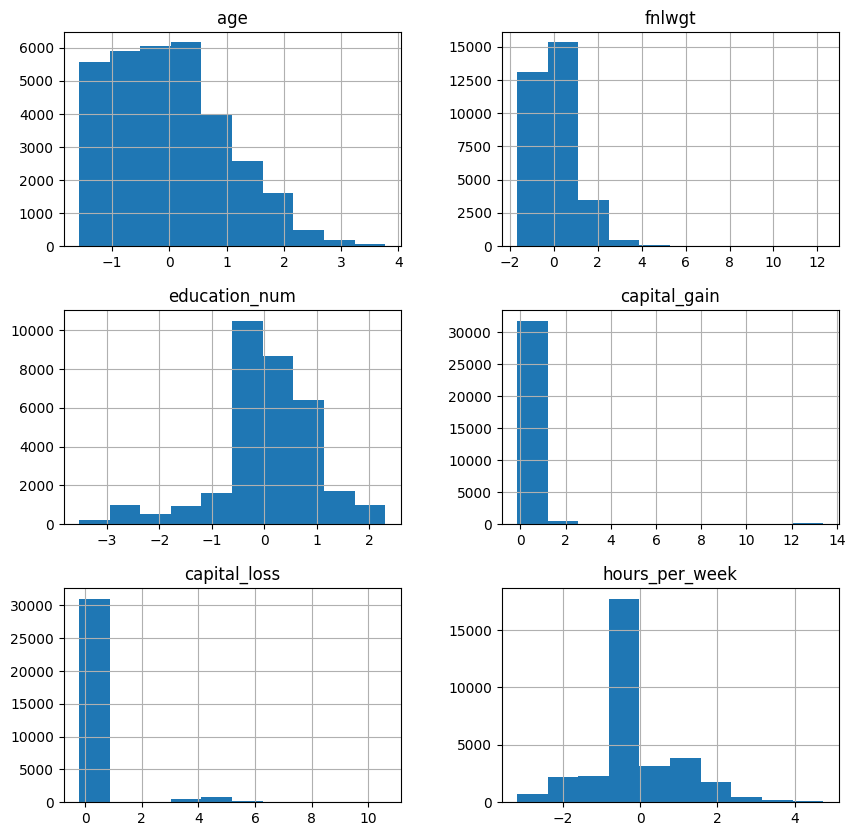

In [16]:
df_ss.hist(figsize = (10,10))
plt.show()

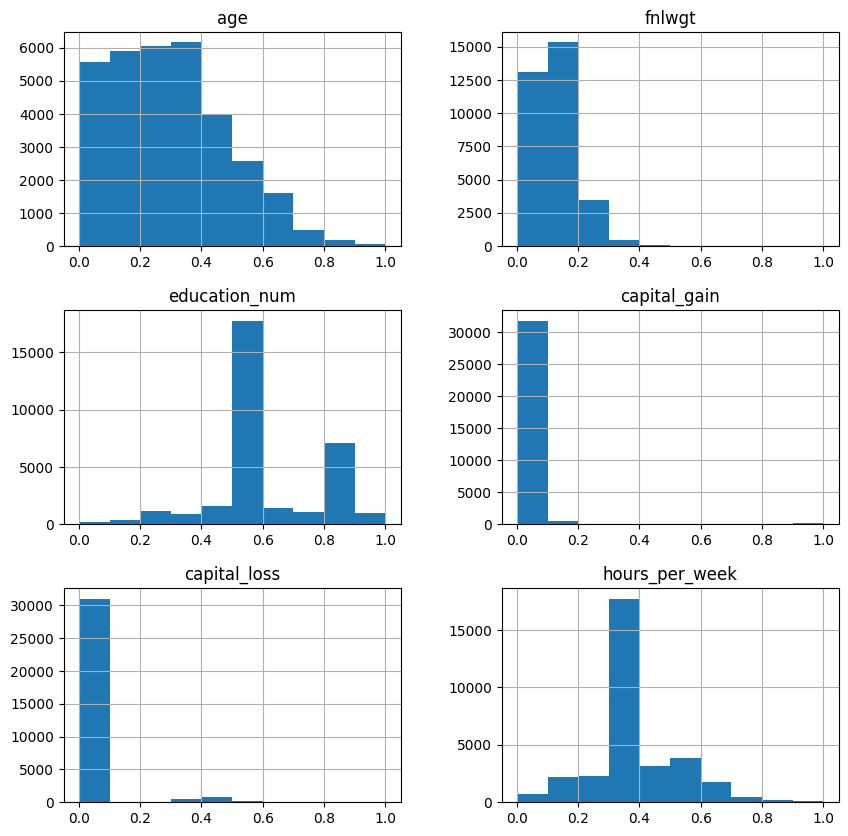

In [17]:
df_mms.hist(figsize = (10,10))
plt.show()

# **2. Encoding Techniques**

In [18]:
# Selecting the categorical columns
cat_col = df.select_dtypes(include = ('object')).columns
cat_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [19]:
# Performing one hot encoding on categorical columns with less that 5 categories
for i in cat_col:
    if df[i].nunique() < 5:
       df = pd.get_dummies(df, columns = [i], drop_first= True)

df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,1,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,1,0


In [20]:
# Performing Label encoding on categorical columns with categories more than or equal 5
le = LabelEncoder()
cat_col2 = df.select_dtypes(include = ('object')).columns # Recalculate cat_col to reflect changes

for i in cat_col2:
   if df[i].nunique() >= 5:
       df[i] = le.fit_transform(df[i])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,1,0


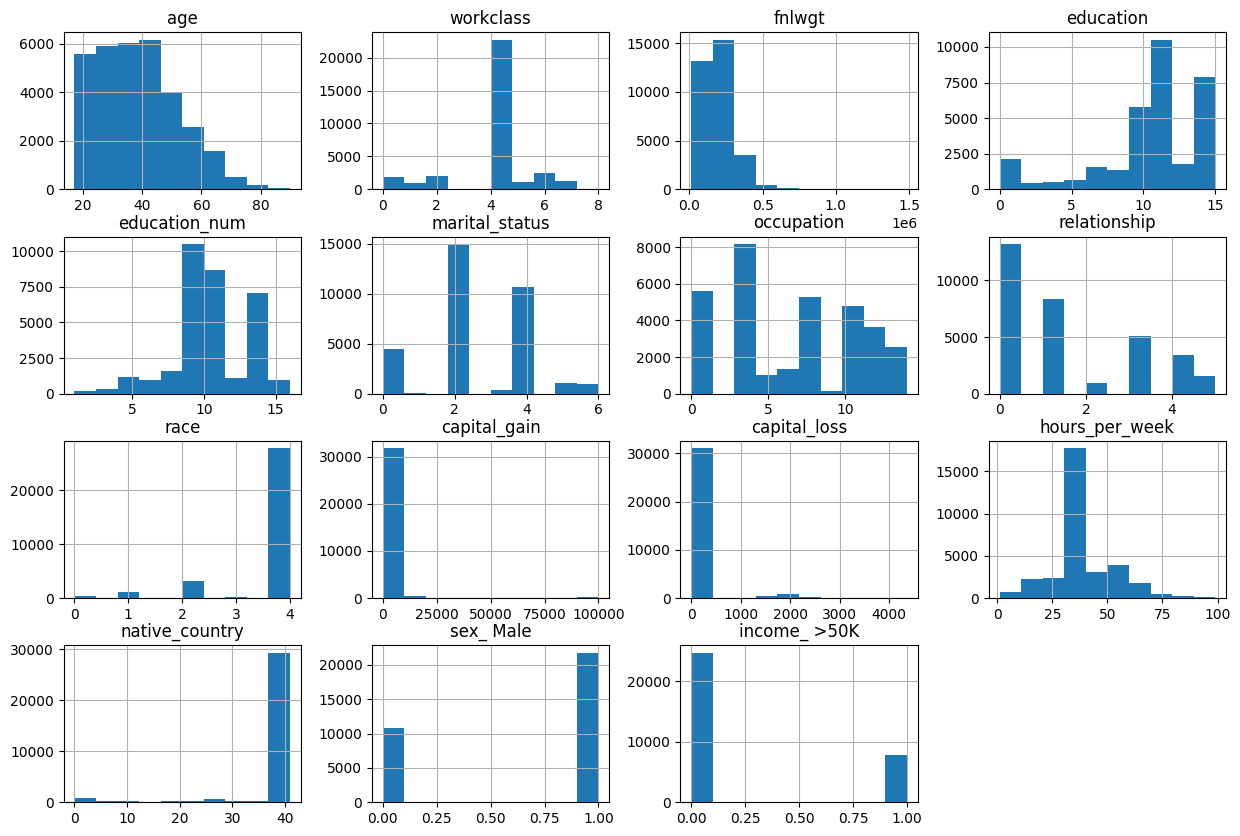

In [21]:
# Plotting histogram on the dataset to visualise their distribution
df.hist(figsize = (15,10))
plt.show()

# **3. Feature Engineering**

In [22]:
# Calculating the correlation matrix on the numerical data
corr = df.corr()
corr

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.077674,0.057775,0.068756,-0.001151,0.088832,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.033835,0.012216,0.138962,-0.007690,0.095981,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.000432,-0.010252,-0.018768,-0.051966,0.026858,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,0.030046,0.016746,0.055510,0.064288,-0.027356,0.079317
education_num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.122630,0.079923,0.148123,0.050840,0.012280,0.335154
marital_status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.043393,-0.034187,-0.190519,-0.023819,-0.129314,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.025505,0.017987,0.080383,-0.012543,0.080296,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.057919,-0.061062,-0.248974,-0.005507,-0.582454,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.011145,0.018899,0.041910,0.137852,0.087204,0.071846
capital_gain,0.077674,0.033835,0.000432,0.030046,0.122630,-0.043393,0.025505,-0.057919,0.011145,1.000000,-0.031615,0.078409,-0.001982,0.048480,0.223329


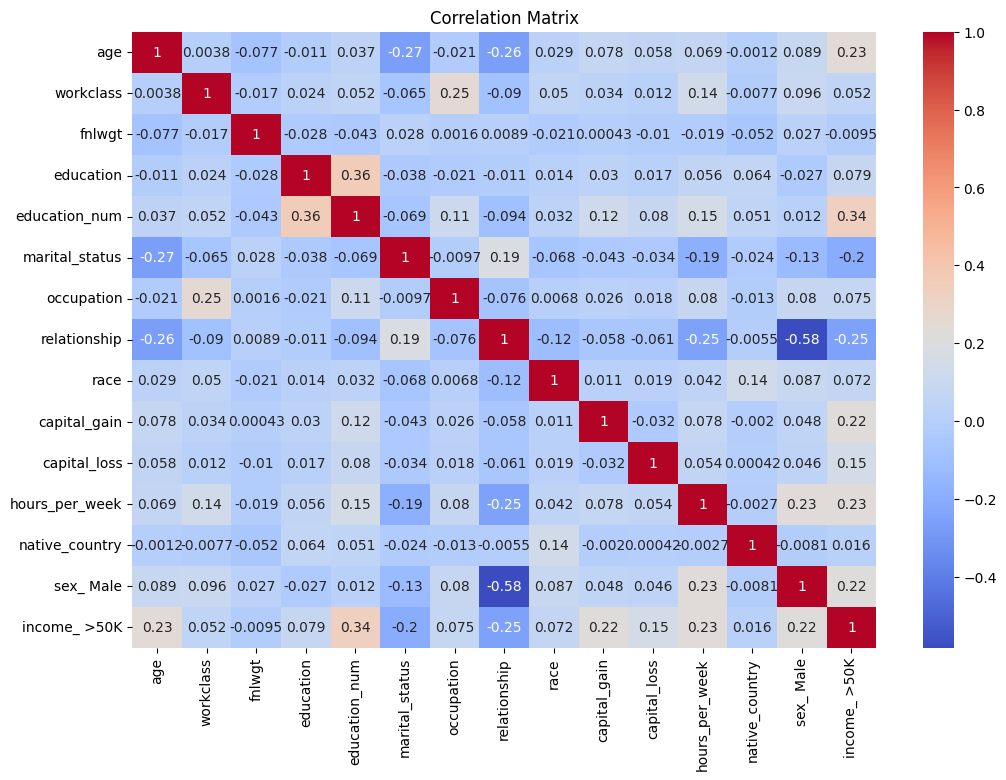

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Creating new features
df['capital_gain_loss'] = df['capital_gain'] - df['capital_loss']
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,capital_gain_loss
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0,2174
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1,0
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,1,0,0


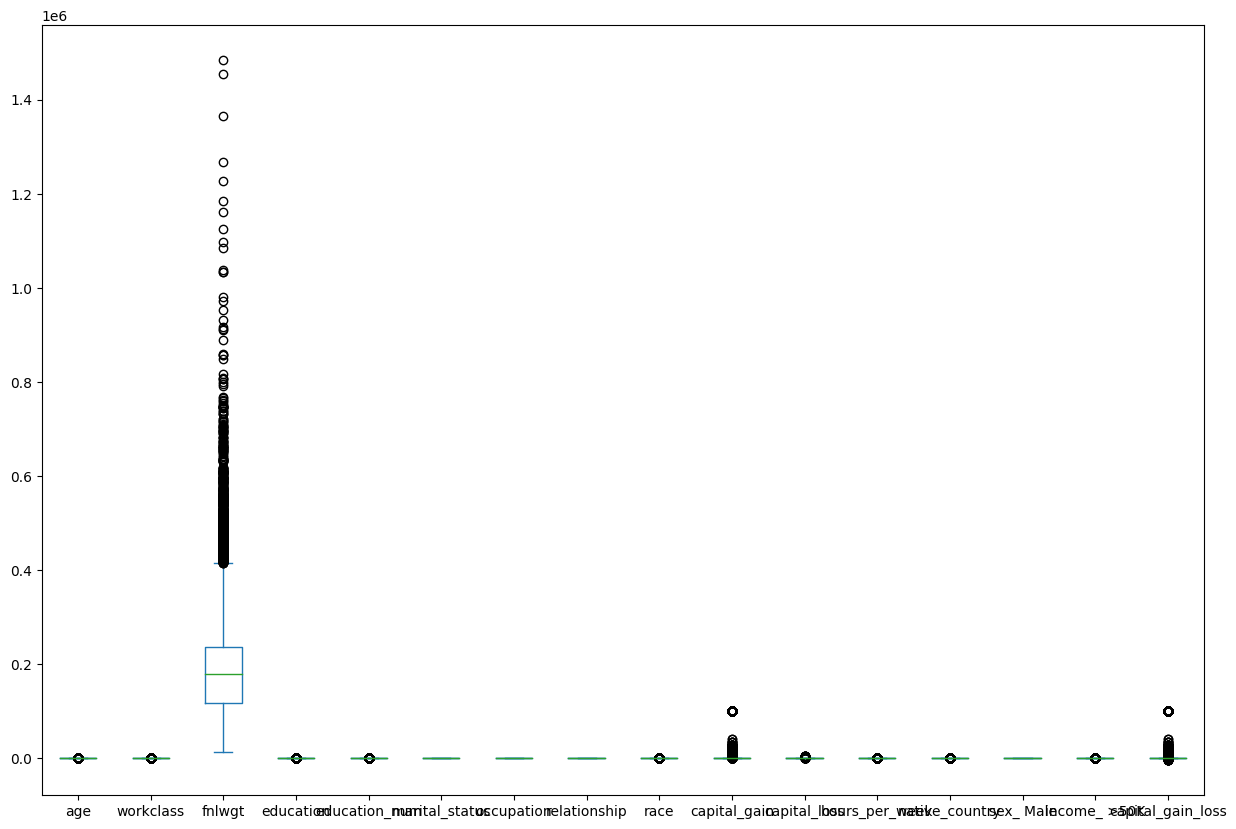

In [25]:
# Plotting box plots to view skewness
df.plot(kind = 'box', figsize = (15,10))
plt.show()

In [26]:
# Applying log transformation to fnlwgt column as it has the most skewness
df['Log of fnlwgt'] = np.log(df['fnlwgt'])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,capital_gain_loss,Log of fnlwgt
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0,2174,11.258240
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0,0,11.330336
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0,0,12.281393
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0,0,12.366153
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0,0,12.732011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0,0,12.458006
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1,0,11.947134
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0,0,11.931044
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,1,0,0,12.213495


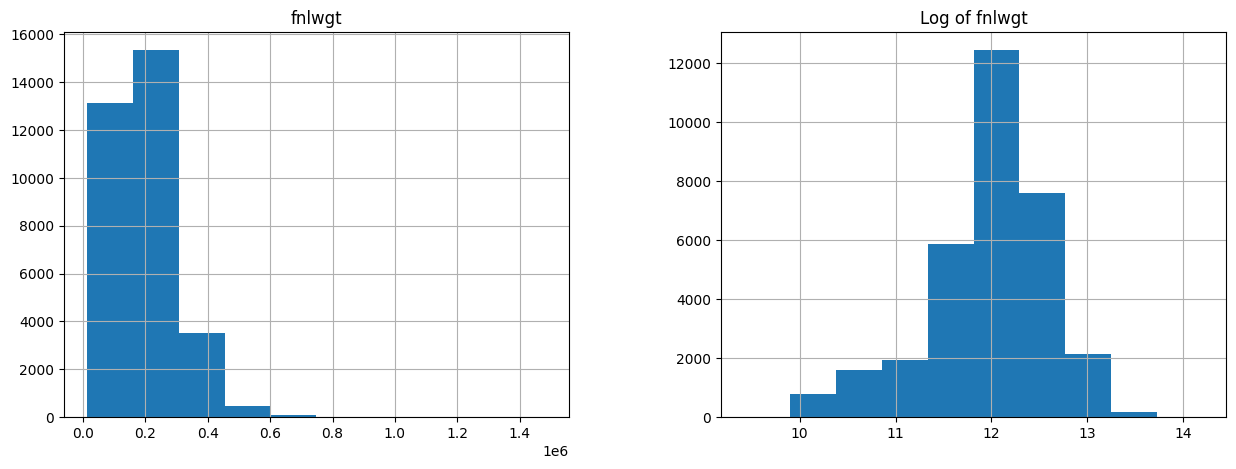

In [27]:
# Plotting the histograms of  fnlwgt column and Log of fnlwgt column beside each other to compare the transformation
df[['fnlwgt', 'Log of fnlwgt']].hist(figsize = (15,5))
plt.show()

In [28]:
# As we can see, after applying log transformation on fnlwgt column a highly skewed data has been converted to a nearly normally distuibuted data

# **4. Feature Selection**

In [29]:
# Using Isolation forest to detect and remove outliers
isofo = IsolationForest(contamination=0.05, random_state=42)
outlier_preds = isofo.fit_predict(df)

# Create a mask to identify outliers
mask = outlier_preds != -1

# Remove outliers from the dataframe
df_clean = df.loc[mask]

df_clean

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,capital_gain_loss,Log of fnlwgt
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0,2174,11.258240
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0,0,11.330336
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0,0,12.281393
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0,0,12.366153
5,37,4,284582,12,14,2,4,5,4,0,0,40,39,0,0,0,12.558777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,4,310152,15,10,4,11,1,4,0,0,40,39,1,0,0,12.644818
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,0,0,12.458006
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,1,0,11.947134
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,0,0,11.931044


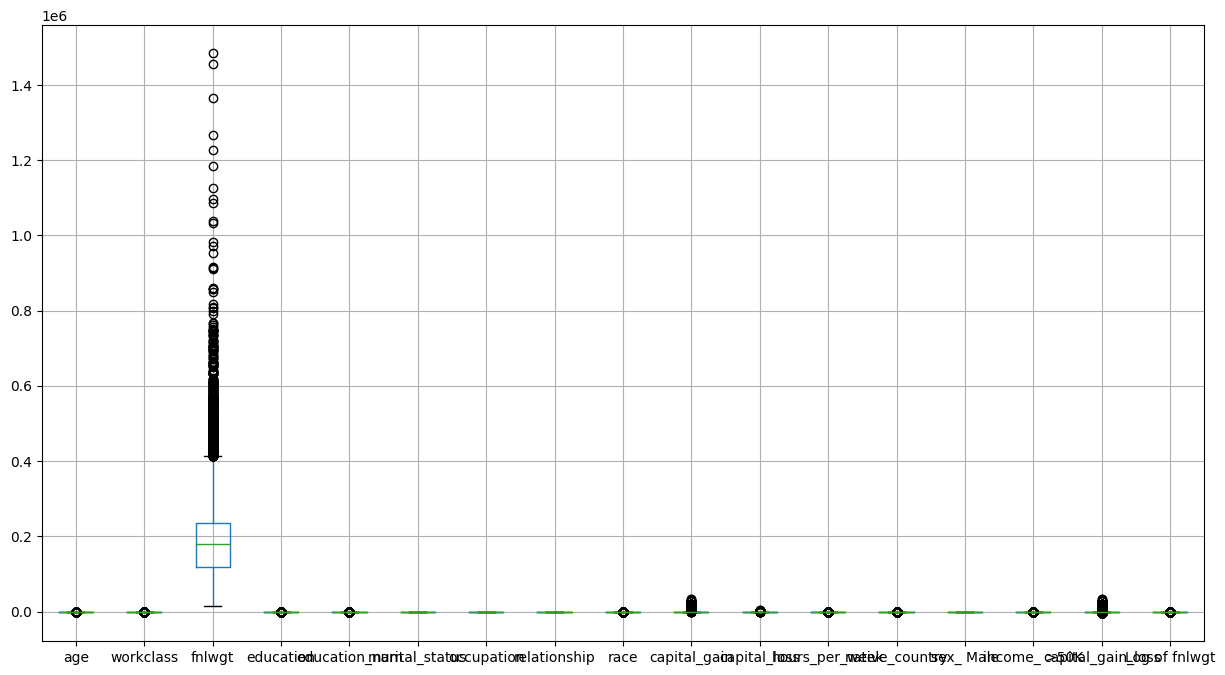

In [30]:
df_clean.boxplot(figsize = (15,8))
plt.show()

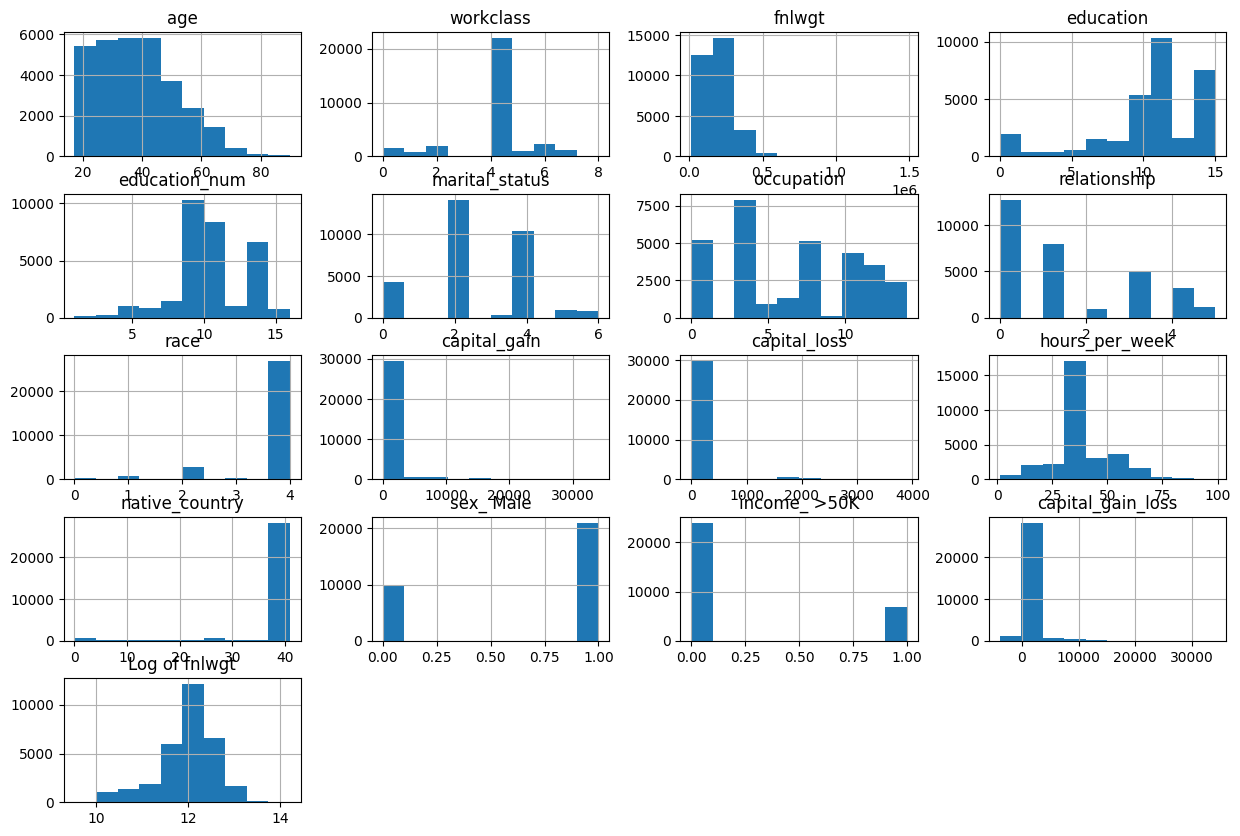

In [31]:
# Plotting histograms
df_clean.hist(figsize = (15,10))
plt.show()

In [32]:
# Outliers can affect model performance by introducing noise and skewing the data distribution.

In [37]:
# Performing PPS analysis
pps_matrix = pps.matrix(df_clean)
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.7228,0.855934,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,74246.4820,75407.097370,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.6746,2.729251,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,1.8164,1.871490,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
284,Log of fnlwgt,native_country,0.0,regression,True,mean absolute error,1.9170,3.394463,DecisionTreeRegressor()
285,Log of fnlwgt,sex_ Male,0.0,regression,True,mean absolute error,0.3176,0.386633,DecisionTreeRegressor()
286,Log of fnlwgt,income_ >50K,0.0,regression,True,mean absolute error,0.2228,0.327607,DecisionTreeRegressor()
287,Log of fnlwgt,capital_gain_loss,0.0,regression,True,mean absolute error,470.8798,895.065000,DecisionTreeRegressor()


In [40]:
pps_matrix_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')

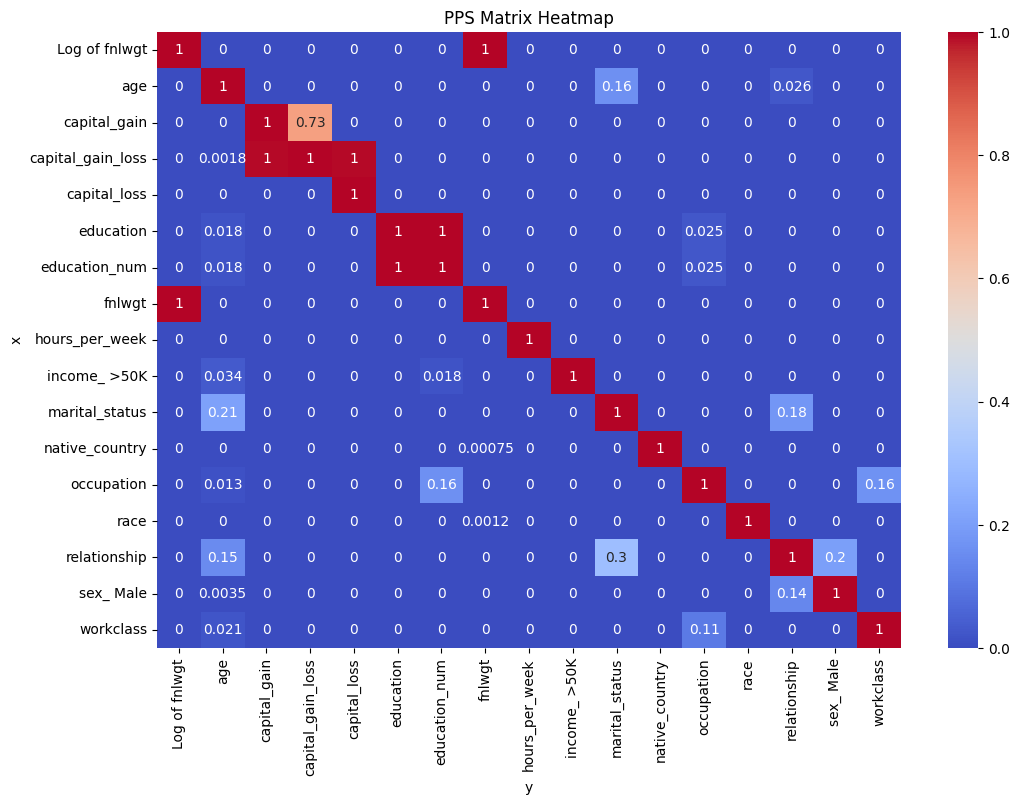

In [41]:
# Visualising a pps matrix as a heat map using pps_matrix_pivot as the data
plt.figure(figsize=(12, 8))
sns.heatmap(pps_matrix_pivot, annot=True, cmap='coolwarm')
plt.title('PPS Matrix Heatmap')
plt.show()

In [42]:
df_clean.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,capital_gain_loss,Log of fnlwgt
age,1.000000,0.020970,-0.078356,-0.002091,0.043934,-0.301166,-0.014756,-0.291102,0.039711,0.102913,0.044095,0.093457,0.022709,0.106045,0.234796,0.093083,-0.057684
workclass,0.020970,1.000000,-0.019900,0.011348,0.042659,-0.056167,0.233050,-0.089457,0.046684,0.034885,0.015525,0.121418,-0.021826,0.086425,0.045728,0.031454,-0.022796
fnlwgt,-0.078356,-0.019900,1.000000,-0.028676,-0.044451,0.030762,0.000104,0.014542,-0.036417,-0.013125,-0.012144,-0.023529,-0.057713,0.022867,-0.011566,-0.010755,0.906114
education,-0.002091,0.011348,-0.028676,1.000000,0.340410,-0.026305,-0.025808,0.000970,-0.005007,0.024960,0.020769,0.048425,0.058272,-0.042377,0.070046,0.020851,-0.031561
education_num,0.043934,0.042659,-0.044451,0.340410,1.000000,-0.051606,0.103877,-0.097740,0.033725,0.128227,0.069843,0.139109,0.062855,0.004552,0.315707,0.113427,-0.039582
marital_status,-0.301166,-0.056167,0.030762,-0.026305,-0.051606,1.000000,-0.003501,0.201108,-0.073478,-0.060729,-0.037114,-0.191747,-0.030994,-0.127357,-0.196631,-0.053029,0.030253
occupation,-0.014756,0.233050,0.000104,-0.025808,0.103877,-0.003501,1.000000,-0.076942,0.013144,0.019723,0.013992,0.064729,-0.013145,0.078318,0.070030,0.016890,0.001314
relationship,-0.291102,-0.089457,0.014542,0.000970,-0.097740,0.201108,-0.076942,1.000000,-0.112874,-0.124141,-0.089534,-0.254952,0.017257,-0.571294,-0.291814,-0.106060,0.022698
race,0.039711,0.046684,-0.036417,-0.005007,0.033725,-0.073478,0.013144,-0.112874,1.000000,0.049091,0.043878,0.049240,0.093435,0.081292,0.097305,0.040491,-0.033590
capital_gain,0.102913,0.034885,-0.013125,0.024960,0.128227,-0.060729,0.019723,-0.124141,0.049091,1.000000,-0.043272,0.087306,0.038486,0.100796,0.287772,0.985258,-0.003521


Text(0.5, 1.0, 'Correlation Matrix')

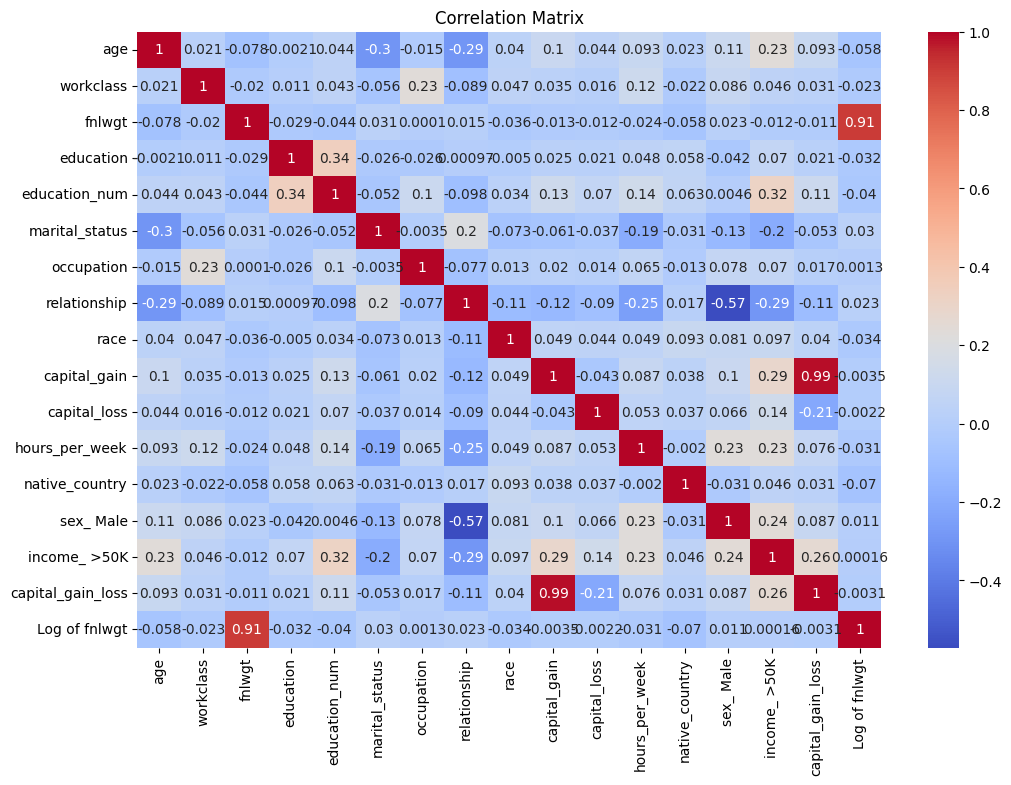

In [43]:
# Creating a heat map for the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [44]:
# PPS gives the predictive power between 2 variables, correlation matrix gives the linear relation between the 2 variables